# PSYN

# Importation des bibliothèques

In [1]:
#!pip install nbformat
#!pip install nbconvert
#!pip install openpyxl
#!pip install imbalanced-learn
#! pip install tools
#! pip install ace_tools 
# ! pip install scipy


In [2]:
import pandas as pd  # Manipulation de données
import numpy as np  # Calculs numériques
import matplotlib.pyplot as plt  # Visualisation de données
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import seaborn as sns  # Visualisation avancée
import sklearn
from datetime import datetime
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import pearsonr

# Importation des bibliothèques de scikit-learn pour la modélisation
from sklearn.model_selection import train_test_split  # Division des données en ensembles d'entraînement et de test
from sklearn.ensemble import RandomForestClassifier  # Modèle de classification Random Forest
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.pipeline import make_pipeline  # Construction de pipelines pour le prétraitement et les modèles
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Normalisation et transformation polynomiale
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Imputation des valeurs manquantes
from sklearn.decomposition import PCA  # Réduction de dimension avec PCA
from sklearn.metrics import accuracy_score, classification_report   # Évaluation des modèles
from sklearn.metrics import confusion_matrix

# Import des outils de scikit-learn nécessaires
from sklearn.model_selection import GridSearchCV  # Optimisation des hyperparamètres
from sklearn.metrics import roc_auc_score, roc_curve  # Évaluation avec AUC-ROC
from sklearn.model_selection import cross_val_score  # Validation croisée
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import label_binarize


# Importation des données

In [3]:
# Charger le fichier Excel
# df = pd.read_excel("C:\\Users\\anton\\Downloads\\sncf_data.xlsx")  
df = pd.read_excel("C:\\Users\\\scoup\\Downloads\\sncf_data.xlsx")
# Convertir en CSV
df.to_csv("data_csv", index=False, encoding="utf-8")

ligns,columns = df.shape
df.head()


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\scoup\AppData\Local\Temp\ipykernel_4512\2753491967.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_excel("C:\\Users\\\scoup\\Downloads\\sncf_data.xlsx")


,symbol,supplier,serial letter,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),...,do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,qté cible,"no longer supply (new or used), no longer supply new, reparable, supply new",product policy (short-term vision year - 2023),processing date,label
0,79544181,SCLE,AB,1,1,1,1,1,1,0,...,0,0,1,1050,837,NaN,supply new,6,2023-07-05,stock
1,79402561,SCLE,BA,0,0,0,0,0,1,0,...,1,1,1,436,999,NaN,supply new,100,2023-07-11,redesign mineur
2,79540265,SCLE,BA,0,0,1,0,1,0,0,...,1,1,1,70,1655,NaN,supply new,100,2022-08-01,substitution
3,79540265,SCLE,BB,0,0,1,0,1,0,0,...,1,1,1,149,1655,NaN,supply new,100,2022-08-01,substitution
4,79540265,SCLE,BBM,0,0,1,0,1,0,0,...,1,1,1,24,1655,NaN,supply new,100,2022-08-01,substitution


Titres et infos des colonnes

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 22 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   symbol                                                                       317 non-null    int64         
 1   supplier                                                                     317 non-null    object        
 2   serial letter                                                                317 non-null    object        
 3   repair complexity (0NA)                                                      317 non-null    int64         
 4   evaluation ratio between repair cost and cost of new (0NA)                   317 non-null    int64         
 5   
existing substitute product (0NA)                                           317 non-null    int64 

Statistiques descriptives

In [5]:
print("\nStatistiques descriptives :")
print(df.describe(include='all'))


Statistiques descriptives :
              symbol supplier serial letter  repair complexity (0NA)  \
count   3.170000e+02      317           317               317.000000   
unique           NaN       11            84                      NaN   
top              NaN  HITACHI            AA                      NaN   
freq             NaN      223            20                      NaN   
mean    7.929434e+07      NaN           NaN                 0.085174   
min     2.071580e+06      NaN           NaN                 0.000000   
25%     7.954026e+07      NaN           NaN                 0.000000   
50%     7.954401e+07      NaN           NaN                 0.000000   
75%     7.954502e+07      NaN           NaN                 0.000000   
max     7.956512e+07      NaN           NaN                 1.000000   
std     4.351020e+06      NaN           NaN                 0.279581   

        evaluation ratio between repair cost and cost of new (0NA)  \
count                               

# Adaptation des données

In [6]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
symbol                                                                           0
supplier                                                                         0
serial letter                                                                    0
repair complexity (0NA)                                                          0
evaluation ratio between repair cost and cost of new (0NA)                       0
\nexisting substitute product (0NA)                                              0
component having a role in security (0NA)                                        0
does the product/block if the component have a role in security? (0NA)           0
several components involved? (0NA)                                               0
is the product recent? (<10 years) (0NA)                                         0
\nis the cost of inventory expensive (0NA)                                       3
substitution component not available (0NA)            

In [7]:
# On ne prend pas en compte les colonnes "qté cible" et "product policy" (trop de valeurs manquantes)*

df = df.drop(columns=['qté cible','product policy (short-term vision year - 2023)'])

In [8]:
# On remplace les cellules vides par la valeur 0

df.fillna(0, inplace=True)  # Remplace les NaN par 0



In [9]:
df.head()

,symbol,supplier,serial letter,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),\nis the cost of inventory expensive (0NA),substitution component not available (0NA),do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,"no longer supply (new or used), no longer supply new, reparable, supply new",processing date,label
0,79544181,SCLE,AB,1,1,1,1,1,1,0,0.0,0,0,0,1,1050,837,supply new,2023-07-05,stock
1,79402561,SCLE,BA,0,0,0,0,0,1,0,0.0,1,1,1,1,436,999,supply new,2023-07-11,redesign mineur
2,79540265,SCLE,BA,0,0,1,0,1,0,0,0.0,0,1,1,1,70,1655,supply new,2022-08-01,substitution
3,79540265,SCLE,BB,0,0,1,0,1,0,0,0.0,0,1,1,1,149,1655,supply new,2022-08-01,substitution
4,79540265,SCLE,BBM,0,0,1,0,1,0,0,0.0,0,1,1,1,24,1655,supply new,2022-08-01,substitution


# Analyse de la distribution des variables

Pour les colonnes à valeurs binaires

Colonnes binaires détectées : ['repair complexity (0NA)', 'evaluation ratio between repair cost and cost of new (0NA)', '\nexisting substitute product (0NA)', 'component having a role in security (0NA)', 'does the product/block if the component have a role in security? (0NA)', 'several components involved? (0NA)', 'is the product recent? (<10 years) (0NA)', '\nis the cost of inventory expensive (0NA)', 'substitution component not available (0NA)', 'do we have equipment to carry out approval tests? (0NA)', 'have we done a technical validation? (0NA)', 'generally at least equivalent criterion']


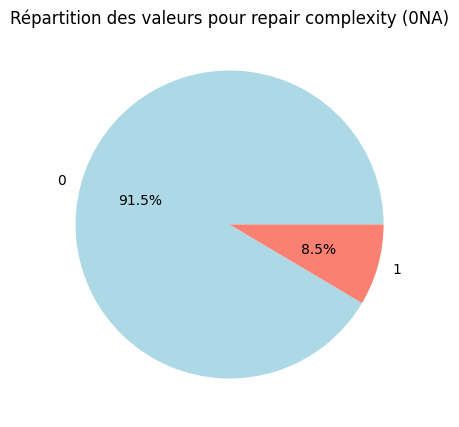

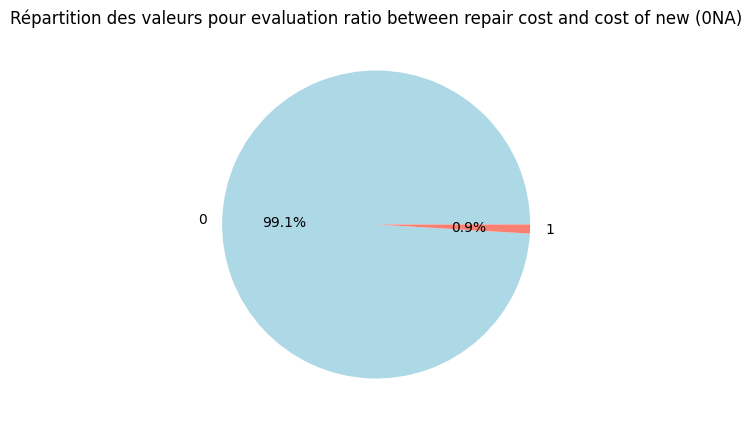

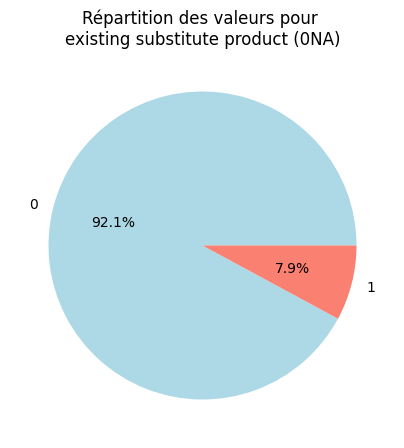

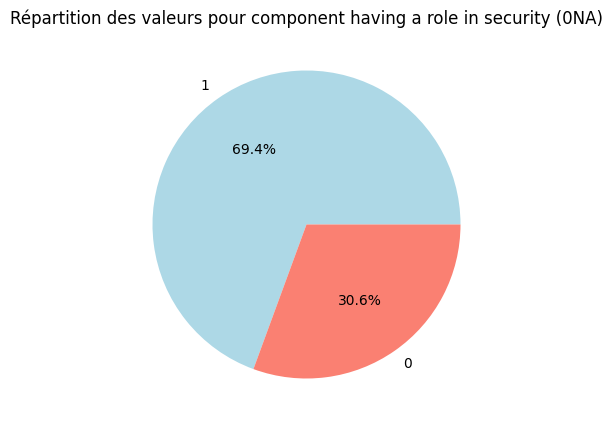

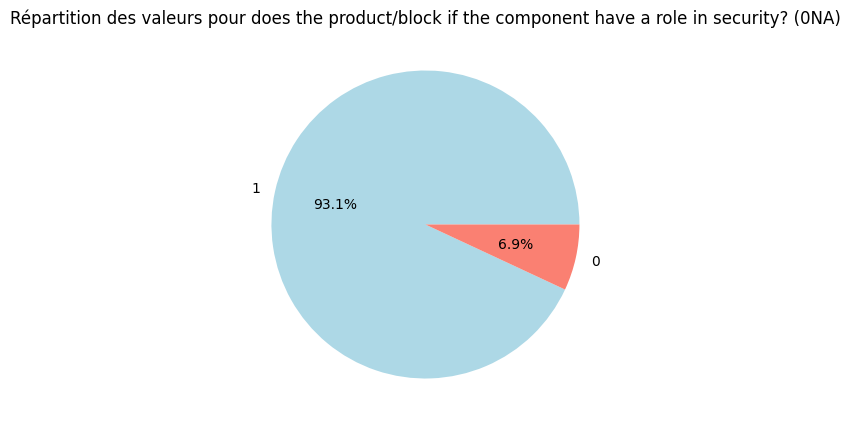

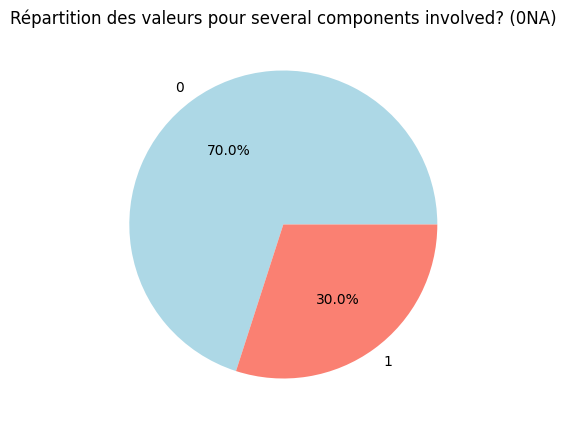

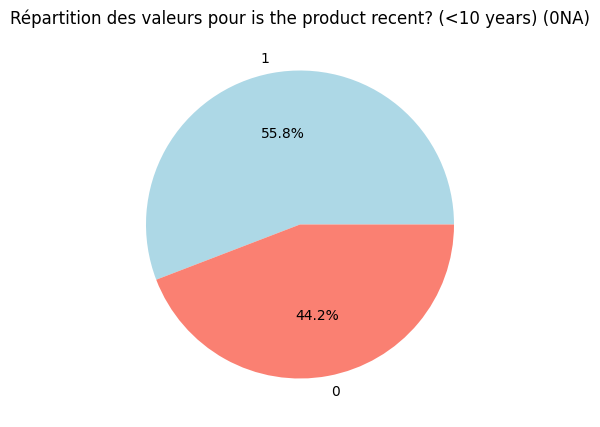

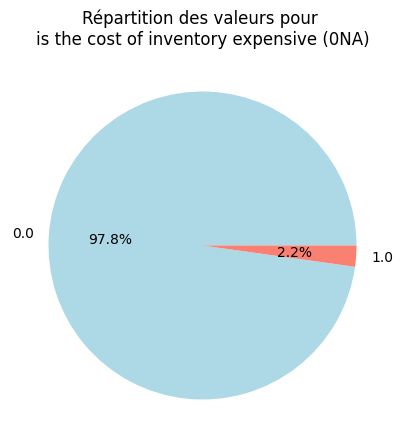

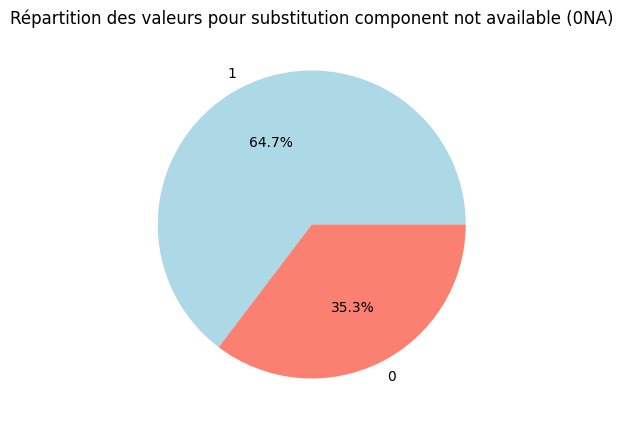

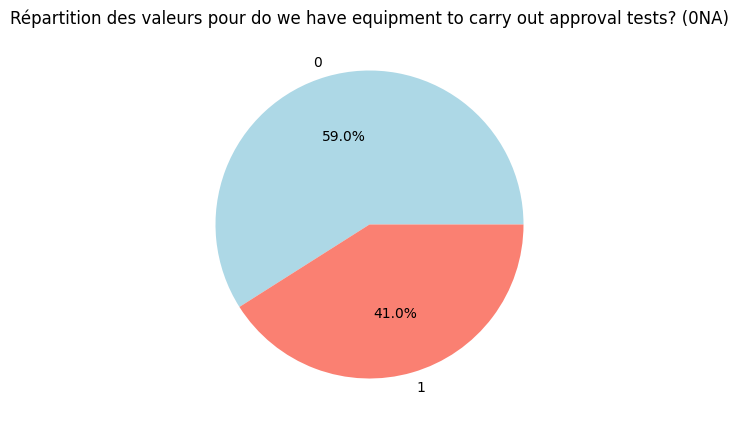

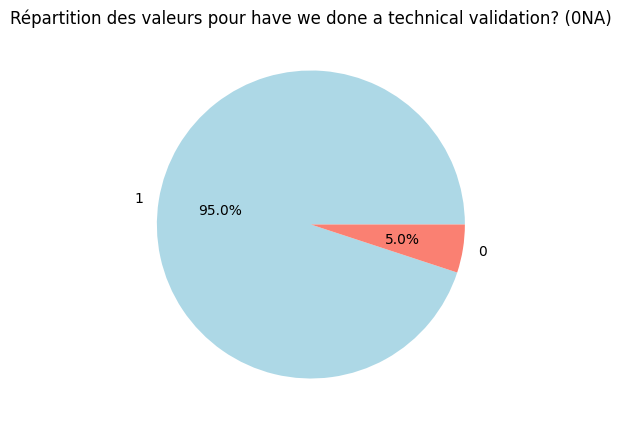

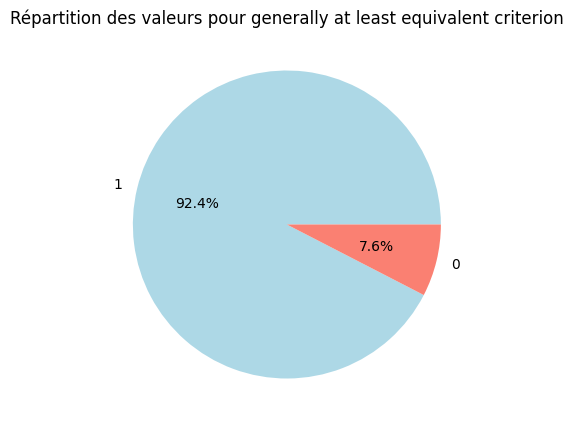

In [10]:
# Sélectionner uniquement les colonnes binaires (0 ou 1)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and sorted(df[col].unique()) == [0, 1]]

# Vérifier les colonnes binaires trouvées
print(f"Colonnes binaires détectées : {binary_cols}")

# Créer des camemberts uniquement pour ces colonnes
for col in binary_cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
    plt.title(f"Répartition des valeurs pour {col}")
    plt.ylabel("")  # Masquer l'étiquette Y
    plt.show()


La répartition des valeurs est déséquilibrée au niveau des inputs pour les colonnes suivantes :

- **Repair complexity** (0NA)  
- **Evaluation ratio between repair cost and cost of new** (0NA)  

- **Existing substitute product** (0NA)  
- **Existing substitute product** (0NA)  

- **Does the product/block or the component have a role in security?** (0NA)  

- **Is the cost of inventory expensive?** (0NA)  
- **Have we done a technical validation?** (0NA)  
- **Generally at least equivalent criterion**


Pour les colonnes à valeur numérique

Colonnes numériques non binaires détectées : ['active quantity', 'quantity of existing stock at SNCF?']


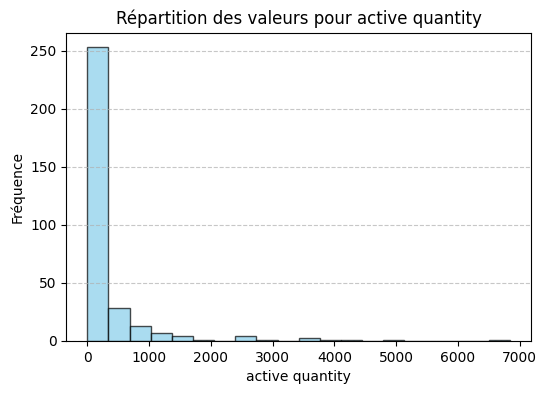

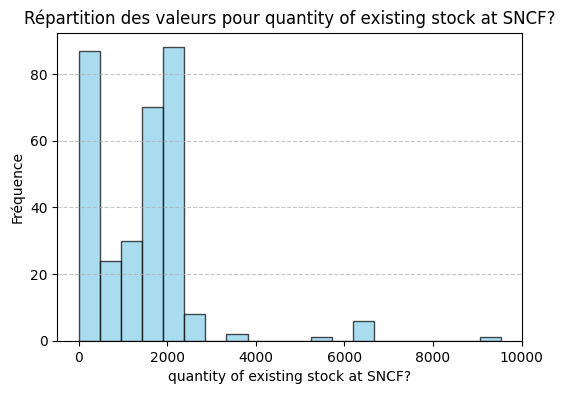

In [11]:
# Sélectionner uniquement les colonnes numériques NON binaires
num_cols = [col for col in df.select_dtypes(include=['number']).columns 
                if df[col].nunique() > 2 and col != "symbol"]  # Exclure "symbol"


# Vérifier les colonnes sélectionnées
print(f"Colonnes numériques non binaires détectées : {num_cols}")

# Créer un histogramme pour chaque colonne
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Répartition des valeurs pour {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


De même, pour les valeurs numériques, les données ne sont pas réparties de manière gaussienne.  


# Analyse de la corrélation entre les variables

Heat map de la corrélation entre les variables

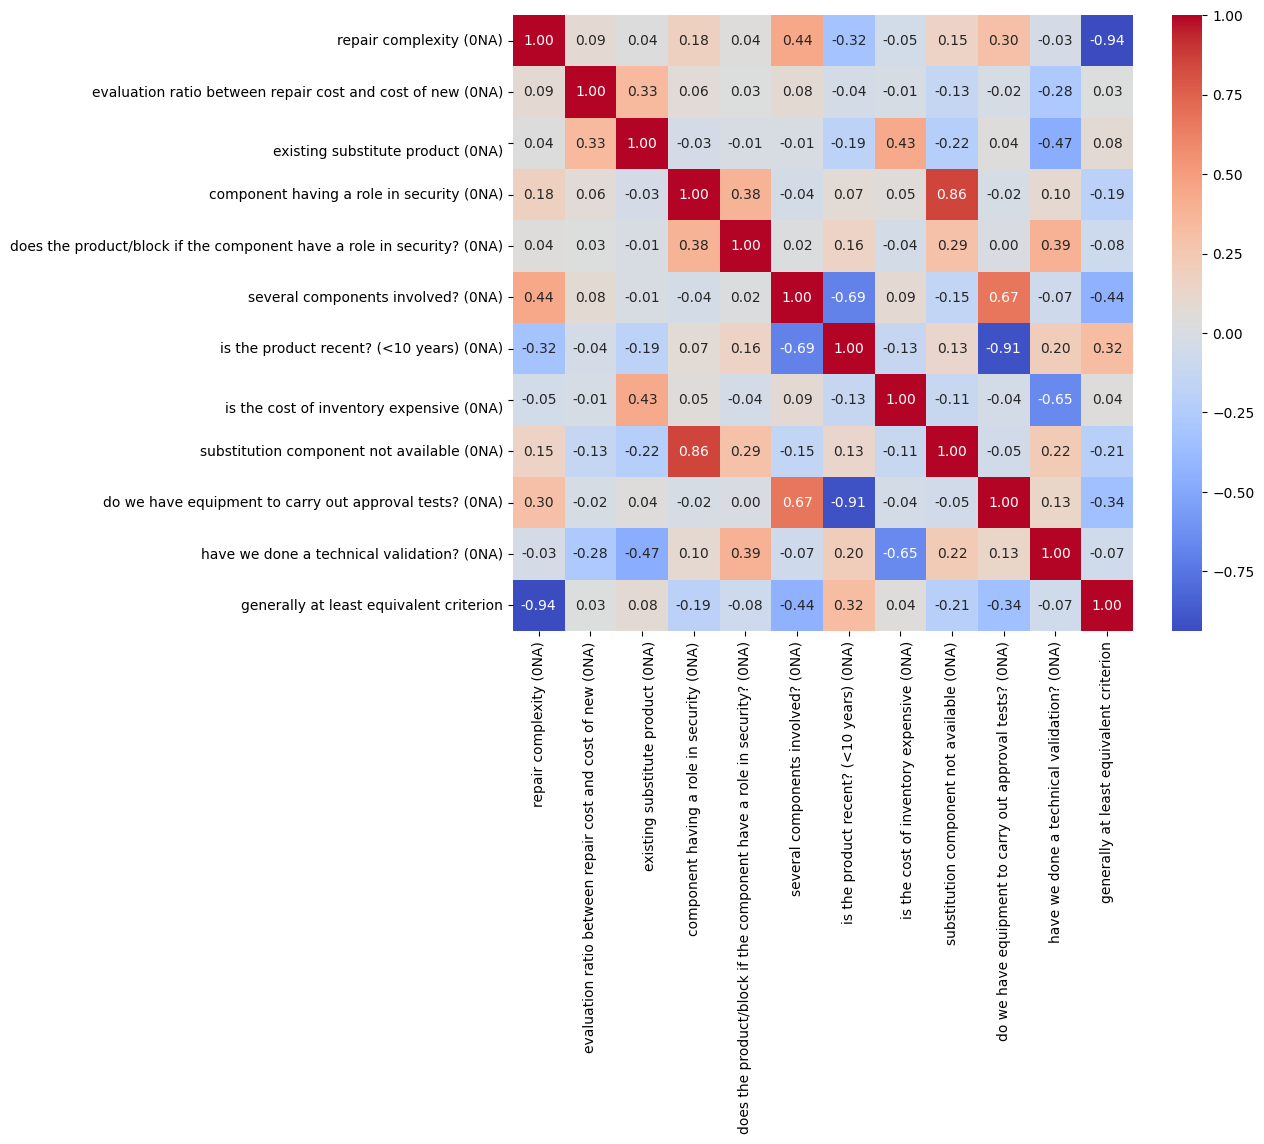

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   symbol                                                                       317 non-null    int64         
 1   supplier                                                                     317 non-null    object        
 2   serial letter                                                                317 non-null    object        
 3   repair complexity (0NA)                                                      317 non-null    int64         
 4   evaluation ratio between repair cost and cost of new (0NA)                   317 non-null    int64         
 5   
existing substitute product (0NA)                                           317 non-null    int64 

In [12]:
# Calculer la matrice de corrélation
corr_matrix = df[binary_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

print(df.info())

In [13]:
# Extraire les paires de colonnes avec une corrélation en valeur absolue > 0.50
strong_corr = corr_matrix.abs() > 0.50

# Afficher les colonnes fortement corrélées (en excluant la diagonale)
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if strong_corr.loc[col1, col2] and col1 != col2
]

# Convertir en DataFrame pour affichage
df_high_corr = pd.DataFrame(high_corr_pairs, columns=["Colonne 1", "Colonne 2", "Corrélation"])
df_high_corr = df_high_corr.drop_duplicates(subset=["Corrélation"]).sort_values(by="Corrélation", ascending=False)

# Affichage des colonnes fortement corrélées
display(df_high_corr)

,Colonne 1,Colonne 2,Corrélation
1,component having a role in security (0NA),substitution component not available (0NA),0.855380
3,several components involved? (0NA),do we have equipment to carry out approval tes...,0.672575
6,\nis the cost of inventory expensive (0NA),have we done a technical validation? (0NA),-0.651766
2,several components involved? (0NA),is the product recent? (<10 years) (0NA),-0.693943
5,is the product recent? (<10 years) (0NA),do we have equipment to carry out approval tes...,-0.911673
0,repair complexity (0NA),generally at least equivalent criterion,-0.937970



# Corrélations et Interprétations

| Corrélation                                           | Interprétation                                                                                                          |
|-------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Sécurité vs Disponibilité (-0.85)**                 | Les composants critiques pour la sécurité ont moins de substituts disponibles, ce qui impose une gestion plus stricte de l'obsolescence.Ce qui est bizarre à voir avec la SNCF |
| **Complexité vs Réparation (-0.93)**                  | Plus un produit est complexe, moins il est facile à réparer, ce qui peut favoriser une stratégie de remplacement.         |
| **Produit récent vs Validation technique (-0.69)**    | Les produits plus récents nécessitent moins de validation technique car ils sont encore compatibles avec les normes actuelles. |
| **Coût de l’inventaire vs Validation technique (-0.65)**| Si un composant coûte cher à stocker, il est possible qu’on privilégie une validation technique plus stricte avant de commander de nouveaux stocks. |
| **(-0.91) Produit récent vs Équipement de test**        | Plus le produit est ancien, plus il faut d’équipements pour valider sa conformité.                                 |
| **(+0.67) Plusieurs composants vs Équipement de test**   | Plus un produit a de composants, plus il nécessite de tests approfondis.                                          |


# Ajout de la notion de la p-value

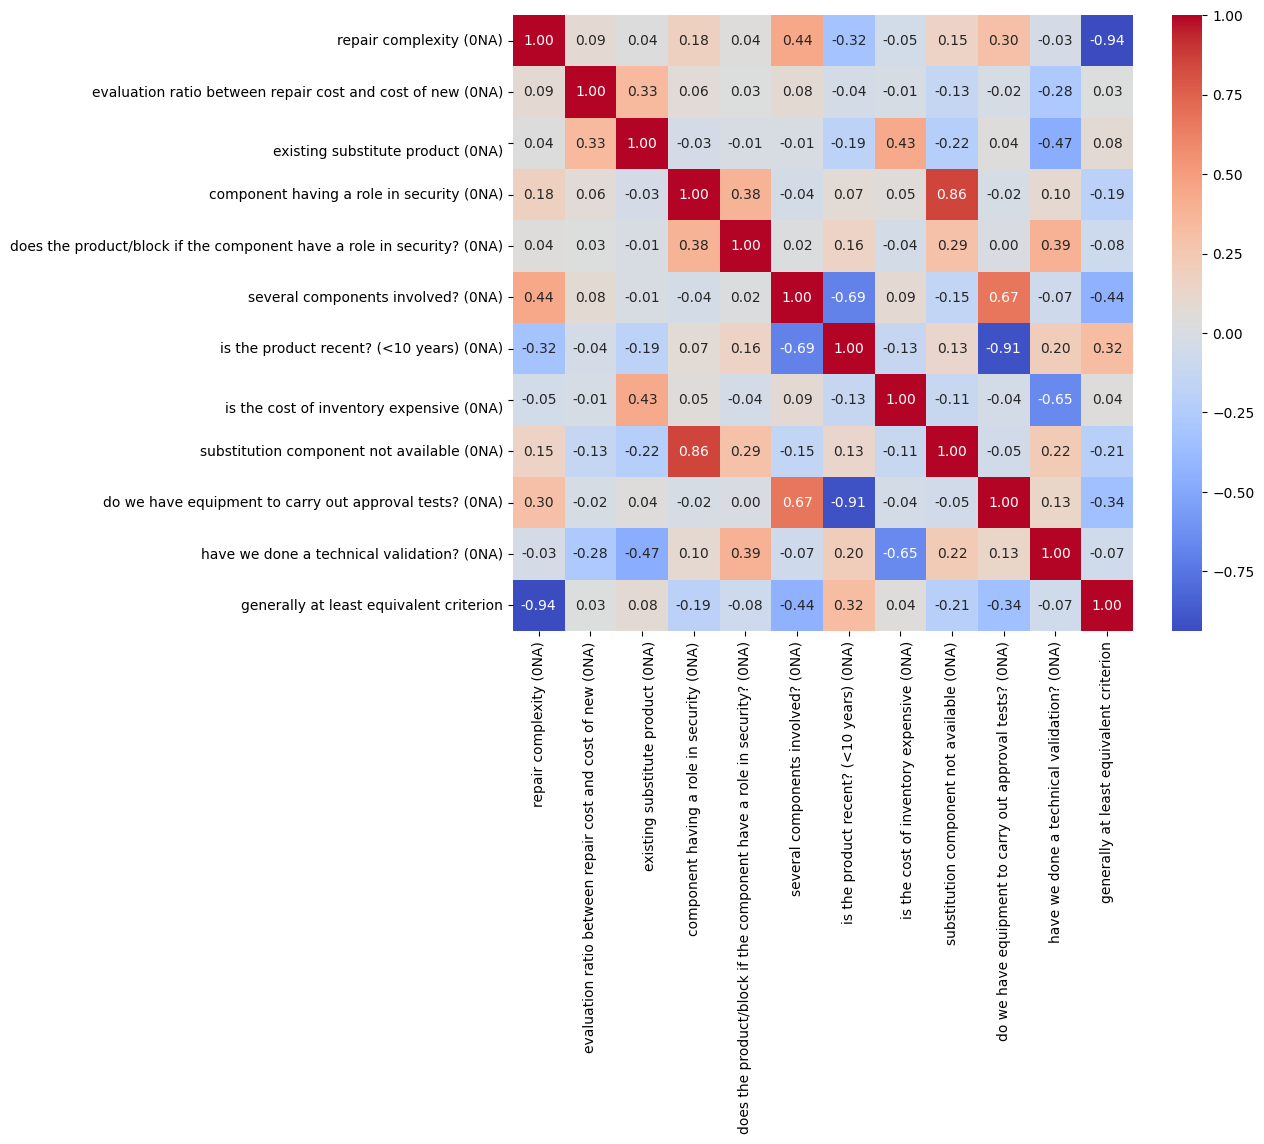

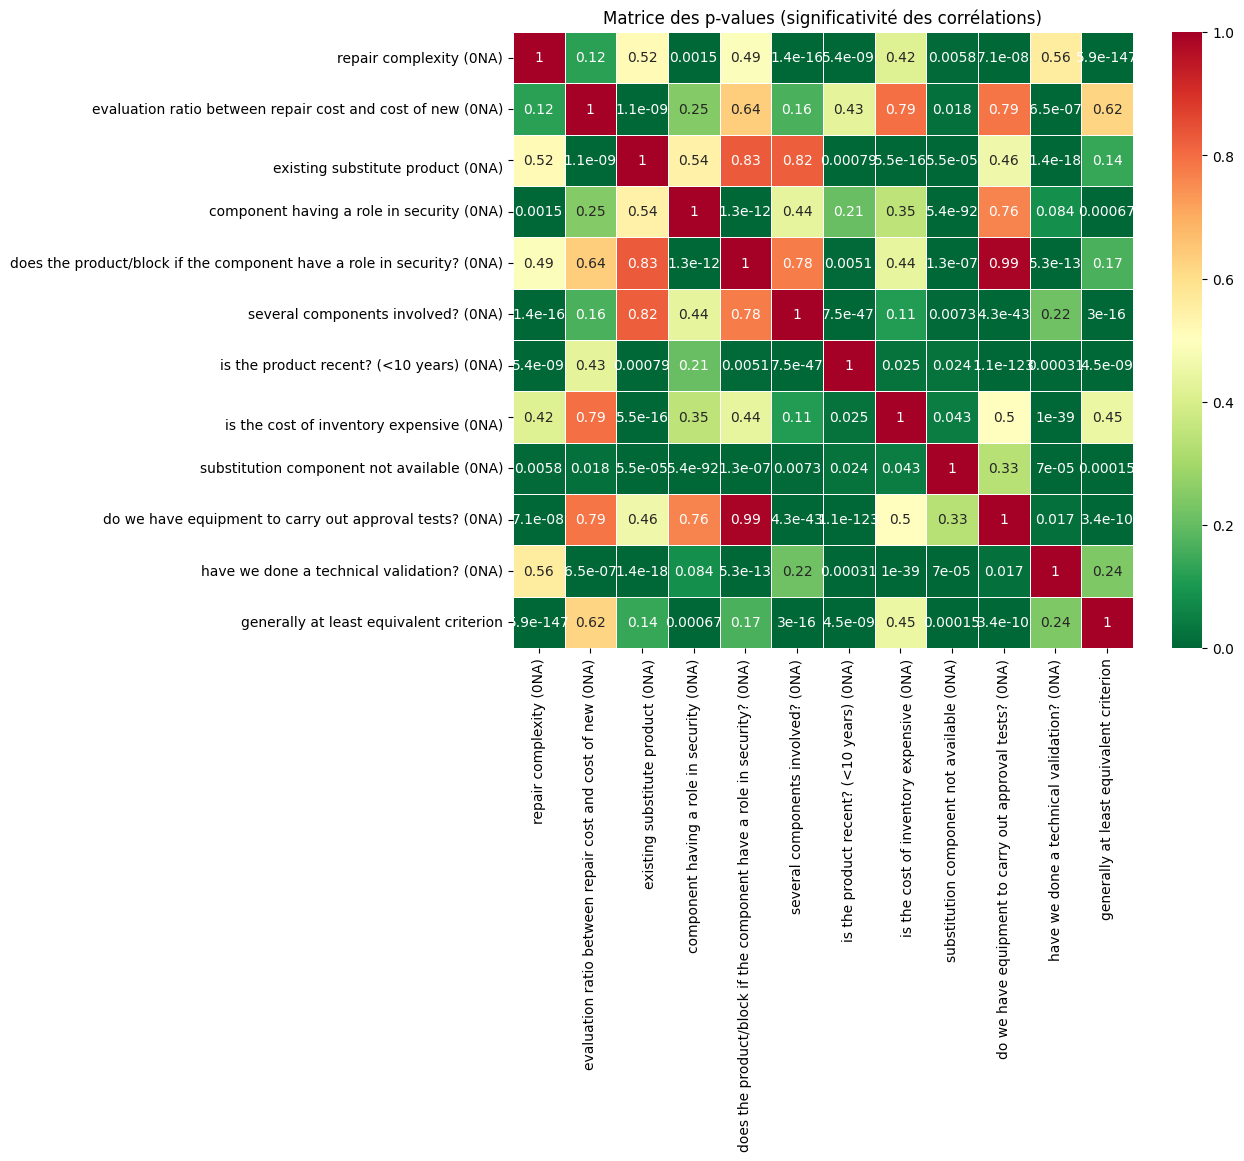

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   symbol                                                                       317 non-null    int64         
 1   supplier                                                                     317 non-null    object        
 2   serial letter                                                                317 non-null    object        
 3   repair complexity (0NA)                                                      317 non-null    int64         
 4   evaluation ratio between repair cost and cost of new (0NA)                   317 non-null    int64         
 5   
existing substitute product (0NA)                                           317 non-null    int64 

In [14]:
# Calculer la matrice de corrélation
corr_matrix = df[binary_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Fonction pour calculer la p-value
def compute_pvalues(df):
    cols = df.columns
    p_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)  # Matrice initialisée à 1
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):  # On évite de recalculer deux fois la même valeur
            corr, p_value = pearsonr(df[cols[i]], df[cols[j]])
            p_matrix.iloc[i, j] = p_value
            p_matrix.iloc[j, i] = p_value  # Matrice symétrique
    return p_matrix

# Calcul de la matrice des p-values
p_values = compute_pvalues(df[binary_cols])

# Palette de couleurs : du vert (faibles p-values) au rouge (fortes p-values)
custom_cmap = sns.color_palette("RdYlGn_r", as_cmap=True)  # "r" pour inverser (0 = vert, 1 = rouge)

# Affichage de la heatmap des p-values
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap=custom_cmap, fmt=".2g", linewidths=0.5, vmin=0, vmax=1)
plt.title("Matrice des p-values (significativité des corrélations)")
plt.show()

print(df.info())

But diminuer nombre de colonnes pour diminnuer la complexite 

## PCA 

In [15]:
# df.info()

In [16]:
# ✅ Charger les données (Remplacez par votre propre DataFrame)
# df = pd.read_csv("votre_fichier.csv")  # Si vous avez un fichier CSV

# ✅ Sélection des colonnes binaires (0/1) - Assurez-vous qu'elles sont bien numériques
cols = df.columns.drop(["symbol", "label", "serial letter","supplier"])
df_pca = df[cols]
df_pca["processing date"] = (datetime.today() - df_pca["processing date"]).dt.days 
df_pca = pd.get_dummies(df_pca)


C:\Users\scoup\AppData\Local\Temp\ipykernel_4512\806159487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca["processing date"] = (datetime.today() - df_pca["processing date"]).dt.days


  Composante Principale  Variance Expliquée (%)
0                   PC1               21.271455
1                   PC2               16.976540
2                   PC3               14.303685
3                   PC4               10.370655
4                   PC5                7.428818


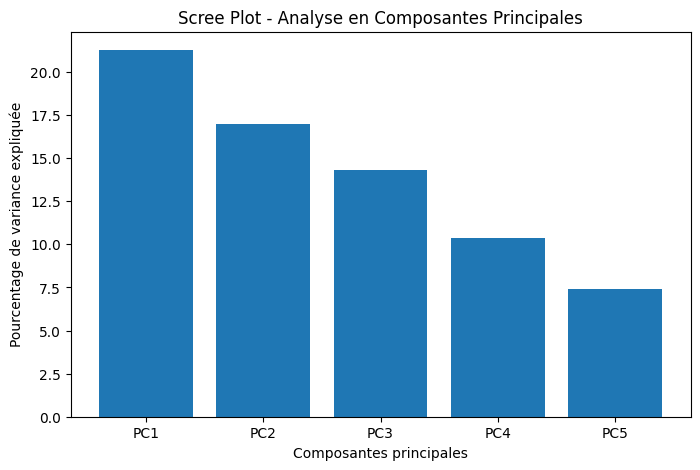

In [17]:
# ✅ Standardisation des données (important pour la PCA)
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# ✅ Appliquer la PCA
pca = PCA(n_components=0.70)  # Garder 95% de la variance
pca_result = pca.fit_transform(df_pca_scaled)

# ✅ Récupération de la variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# ✅ Affichage sous forme de tableau
pca_variance_df = pd.DataFrame({
    'Composante Principale': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Variance Expliquée (%)': explained_variance * 100
})

# ✅ Afficher le tableau des variances expliquées
print(pca_variance_df)

# ✅ Visualisation avec un Scree Plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance * 100, tick_label=[f"PC{i+1}" for i in range(len(explained_variance))])
plt.xlabel("Composantes principales")
plt.ylabel("Pourcentage de variance expliquée")
plt.title("Scree Plot - Analyse en Composantes Principales")
plt.show()


In [18]:
# ✅ Calcul de l'importance des colonnes (chargements des variables)
feature_importance = pd.DataFrame(pca.components_.T, 
                                  index= df_pca.columns, 
                                  columns=[f'PC{i+1}' for i in range(pca.n_components_)])
feature_importance.abs()




,PC1,PC2,PC3,PC4,PC5
repair complexity (0NA),0.340344,0.209722,0.304868,0.083418,0.064115
evaluation ratio between repair cost and cost of new (0NA),0.050182,0.132038,0.003269,0.232796,0.293501
\nexisting substitute product (0NA),0.108904,0.309395,0.019476,0.354604,0.124689
component having a role in security (0NA),0.053820,0.312874,0.075068,0.505931,0.208924
does the product/block if the component have a role in security? (0NA),0.053816,0.305990,0.117056,0.248289,0.169527
several components involved? (0NA),0.420779,0.079048,0.146213,0.064037,0.042462
is the product recent? (<10 years) (0NA),0.418676,0.000177,0.206917,0.049698,0.269247
\nis the cost of inventory expensive (0NA),0.118701,0.266234,0.098932,0.437909,0.231361
substitution component not available (0NA),0.103830,0.382611,0.105405,0.341604,0.261408
do we have equipment to carry out approval tests? (0NA),0.377484,0.122893,0.232075,0.129646,0.258002


In [19]:
# ✅ Calcul de l'importance moyenne de chaque variable (moyenne absolue des contributions)
feature_importance['Importance Moyenne'] = feature_importance.abs().mean(axis=1)

# ✅ Trier par importance décroissante
feature_importance_sorted = feature_importance.sort_values(by="Importance Moyenne", ascending=False)
feature_importance_sorted

,PC1,PC2,PC3,PC4,PC5,Importance Moyenne
substitution component not available (0NA),-0.103830,0.382611,0.105405,0.341604,-0.261408,0.238972
component having a role in security (0NA),-0.053820,0.312874,0.075068,0.505931,-0.208924,0.231323
\nis the cost of inventory expensive (0NA),0.118701,-0.266234,-0.098932,0.437909,0.231361,0.230628
do we have equipment to carry out approval tests? (0NA),0.377484,0.122893,-0.232075,-0.129646,-0.258002,0.224020
"no longer supply (new or used), no longer supply new, reparable, supply new_supply new",-0.048000,-0.268555,0.416198,-0.066588,-0.314946,0.222857
generally at least equivalent criterion,-0.336072,-0.263785,-0.296150,-0.048593,-0.130115,0.214943
processing date,-0.075563,0.110526,0.428024,0.044091,0.370542,0.205749
active quantity,0.101514,-0.252782,-0.108459,0.157217,0.394686,0.202932
repair complexity (0NA),0.340344,0.209722,0.304868,0.083418,0.064115,0.200493
"no longer supply (new or used), no longer supply new, reparable, supply new_reparable",-0.213480,0.215775,-0.406065,0.076673,0.065392,0.195477


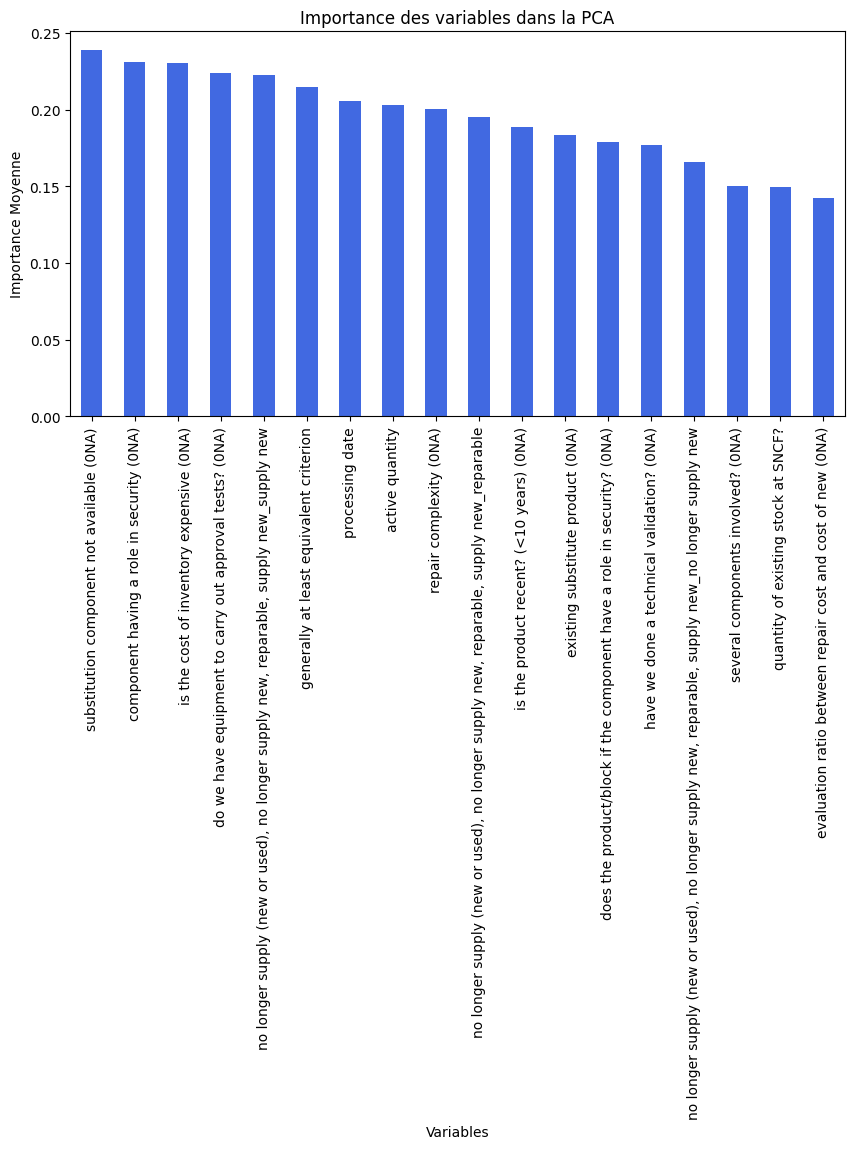

In [20]:
# ✅ Affichage des résultats
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
feature_importance_sorted["Importance Moyenne"].plot(kind="bar", color="royalblue")
plt.ylabel("Importance Moyenne")
plt.xlabel("Variables")
plt.title("Importance des variables dans la PCA")
plt.xticks(rotation=90)
plt.show()

La plupart des colonnes 

Repartition des différentes réponses aux cas d'obsolesence

Colonne label détectée : ['repair complexity (0NA)', 'evaluation ratio between repair cost and cost of new (0NA)', '\nexisting substitute product (0NA)', 'component having a role in security (0NA)', 'does the product/block if the component have a role in security? (0NA)', 'several components involved? (0NA)', 'is the product recent? (<10 years) (0NA)', '\nis the cost of inventory expensive (0NA)', 'substitution component not available (0NA)', 'do we have equipment to carry out approval tests? (0NA)', 'have we done a technical validation? (0NA)', 'generally at least equivalent criterion']


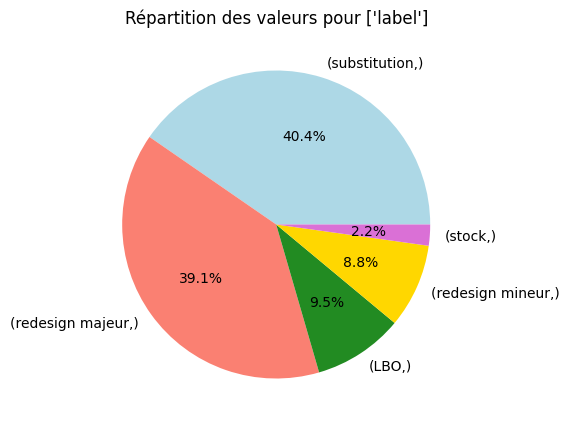

In [21]:
# Sélectionner uniquement les colonnes binaires (0 ou 1)
col_label = [col for col in df.columns if df[col].nunique() == 5]

# Vérifier les colonnes binaires trouvées
print(f"Colonne label détectée : {binary_cols}")

# Créer des camemberts uniquement pour ces colonnes
plt.figure(figsize=(5, 5))
df[col_label].value_counts().plot.pie(autopct="%1.1f%%",colors = ["lightblue", "salmon", "forestgreen", "gold", "orchid"])
plt.title(f"Répartition des valeurs pour {col_label}")
plt.ylabel("")  # Masquer l'étiquette Y
plt.show()


# Random Forest

In [22]:
# Convertir les colonnes de dates en nombre de jours depuis aujourd'hui
for col in df.select_dtypes(include=['datetime64']):
    df[col] = (datetime.today() - df[col]).dt.days 

# Séparer les features (X) et la cible (y)
target_column = "label"  # Remplace par le nom de ta colonne cible
X = df.drop(columns=[target_column])
y = df[target_column]

X





,symbol,supplier,serial letter,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),\nis the cost of inventory expensive (0NA),substitution component not available (0NA),do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,"no longer supply (new or used), no longer supply new, reparable, supply new",processing date
0,79544181,SCLE,AB,1,1,1,1,1,1,0,0.0,0,0,0,1,1050,837,supply new,607
1,79402561,SCLE,BA,0,0,0,0,0,1,0,0.0,1,1,1,1,436,999,supply new,601
2,79540265,SCLE,BA,0,0,1,0,1,0,0,0.0,0,1,1,1,70,1655,supply new,945
3,79540265,SCLE,BB,0,0,1,0,1,0,0,0.0,0,1,1,1,149,1655,supply new,945
4,79540265,SCLE,BBM,0,0,1,0,1,0,0,0.0,0,1,1,1,24,1655,supply new,945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,79545633,HITACHI,B__,1,0,0,1,1,1,0,0.0,1,1,1,0,0,876,supply new,2194
313,79545464,Alstom,AAA,0,0,0,1,0,0,0,0.0,0,1,1,1,6844,2305,supply new,5540
314,79545106,Alstom,AE,0,0,0,1,1,1,0,0.0,0,1,1,1,30,3583,supply new,896
315,79545106,Alstom,AE,0,0,0,1,1,1,0,0.0,0,1,1,1,30,3583,supply new,896


In [23]:
# Stocker la colonne "symbol" pour l'afficher plus tard
X["symbol"] = df["symbol"]
categorical_features = X.nunique()[X.nunique() == 2].index.tolist()
# Encodage des variables catégorielles si nécessaire
X = pd.get_dummies(X)
# je crois il faut pas supprimer la première colonne
# X = pd.get_dummies(X)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Columns: 114 entries, symbol to no longer supply (new or used), no longer supply new, reparable, supply new_supply new
dtypes: bool(98), float64(1), int64(15)
memory usage: 70.1 KB


In [24]:
X.iloc[:, 0:20].head()

,symbol,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),\nis the cost of inventory expensive (0NA),substitution component not available (0NA),do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,processing date,supplier_ALSETEX,supplier_Alstom,supplier_EIFFAGE,supplier_EIVBG
0,79544181,1,1,1,1,1,1,0,0.0,0,0,0,1,1050,837,607,False,False,False,False
1,79402561,0,0,0,0,0,1,0,0.0,1,1,1,1,436,999,601,False,False,False,False
2,79540265,0,0,1,0,1,0,0,0.0,0,1,1,1,70,1655,945,False,False,False,False
3,79540265,0,0,1,0,1,0,0,0.0,0,1,1,1,149,1655,945,False,False,False,False
4,79540265,0,0,1,0,1,0,0,0.0,0,1,1,1,24,1655,945,False,False,False,False


In [25]:
# Séparer les données en ensemble d'entraînement et de test
# stratify y permet d'avoir la même proportion de classes dans les deux ensembles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=42,stratify=y)

# Initialiser et entraîner le modèle Random Forest
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Tester les differentes features

# Importance des différentes colonnes 

In [26]:
pd_importance = pd.DataFrame(model.feature_importances_,
              index = X_train.columns, 
              columns = ["importance"])
important_features = pd_importance[pd_importance["importance"] > 0.05]
important_features_sort = important_features.sort_values(by="importance", ascending=False)
important_features_sort

,importance
symbol,0.138621
component having a role in security (0NA),0.112598
quantity of existing stock at SNCF?,0.090869
substitution component not available (0NA),0.083054
processing date,0.079761
several components involved? (0NA),0.075300
active quantity,0.059720


Ces colonnes sont importantes dans la prédiction du modèle Random Forest, car elles ont une importance supérieure à 0.05 dans l’analyse des features :
En effet, ces caracteristiques diminuent l'impurete de gini en moyenne sur tous les arbres.

**symbol** (0.1208)

**component having a role in security (0NA)**(0.1109)

**quantity of existing stock at SNCF?** (0.0899)

**substitution component not available (0NA)** (0.0874)

**processing date** (0.0798)

**several components involved? (0NA)** (0.0756)

**active quantity** (0.0588)

**do we have equipment to carry out approval tests? (0NA)** (0.0585)

<Figure size 1000x600 with 0 Axes>

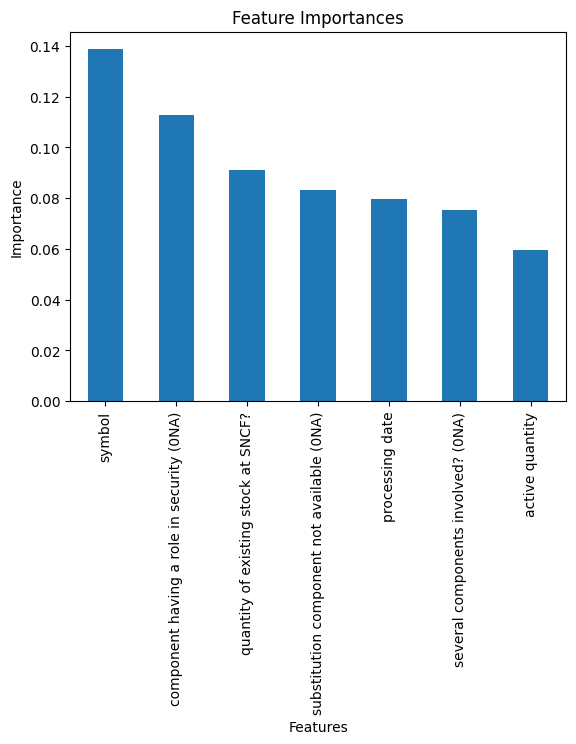

In [27]:
import matplotlib.pyplot as plt

# Draw a bar plot of the important features
plt.figure(figsize=(10, 6))
important_features_sort.plot(kind='bar', legend=False)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

# Diviser train et test avec proportion des classes

**Precision** : la proportion d’éléments prédits positifs qui sont réellement positifs.  

**Recall (Rappel)** : la proportion d’éléments positifs détectés parmi tous les éléments qui sont effectivement positifs.

**F1-score** : la moyenne harmonique de la précision et du rappel (utile quand on veut trouver un équilibre entre les deux).

**Support** : le nombre d’échantillons réels de chaque classe dans le jeu de test (ou de validation).

La ligne **accuracy** indique le pourcentage de prédictions correctes globales.

Les lignes **macro avg** et **weighted avg** représentent des moyennes globales des métriques, respectivement moyennes simples et moyennes pondérées par le nombre d’échantillons dans chaque classe.

In [28]:
# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.94

Rapport de classification :
                 precision    recall  f1-score   support

            LBO       1.00      0.88      0.93        24
redesign majeur       1.00      0.97      0.98        99
redesign mineur       1.00      0.91      0.95        22
          stock       0.00      0.00      0.00         6
   substitution       0.88      1.00      0.94       103

       accuracy                           0.94       254
      macro avg       0.78      0.75      0.76       254
   weighted avg       0.93      0.94      0.93       254



c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

De manière macro, le modèle est bon. Cependant, il est à revoir car on voit au niveau micro. La classe stock n'est pas represente et on peut rien retirer sur les prédictions de stock.


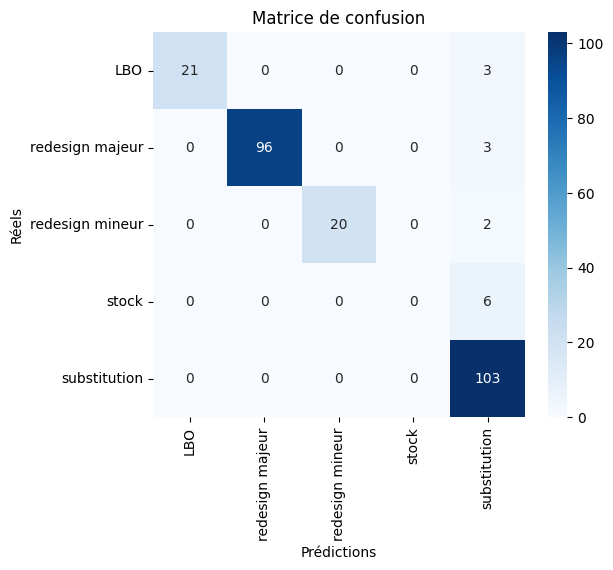

In [29]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"], yticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"])
plt.xlabel("Prédictions")
plt.ylabel("Réels")
plt.title("Matrice de confusion")
plt.show()


Les chiffres dans la matrice représentent les nombre de cas pour chaque combinaison de classes réelles et prédites

# Comparaison prédictions/modèle

In [30]:
resultats = pd.DataFrame({
    "Symbol": X_test["symbol"],
    "Valeur Réelle": y_test.values,
    "Prédiction": y_pred
})

# Fonction pour colorer les cellules
def color_cells(val):
    color = "lightgreen" if val["Valeur Réelle"] == val["Prédiction"] else "lightcoral"
    return [f"background-color: {color}; color: black; font-weight: bold"] * len(val)

# Appliquer le style au DataFrame
styled_resultats = resultats.style.apply(color_cells, axis=1)

# Ajouter un titre avec la précision
styled_resultats.set_caption(f"📊 Précision du modèle : {accuracy:.1%}")

# Afficher le tableau dans Jupyter Notebook
styled_resultats

,Symbol,Valeur Réelle,Prédiction
227,79544012,redesign majeur,redesign majeur
21,79544078,substitution,substitution
115,79545260,substitution,substitution
211,79544011,redesign majeur,redesign majeur
148,79565032,substitution,substitution
38,79520541,substitution,substitution
155,79565122,substitution,substitution
314,79545106,LBO,substitution
313,79545464,redesign mineur,substitution
32,79520542,substitution,substitution


La réponse "Stock existant" est sous-représentée dans nos données, ce qui pousse le modèle à prédire principalement la solution "Substitution".

Cela s'explique par la similarité entre ces deux options et le déséquilibre des classes. Avec un nombre limité d'exemples pour la réponse "Stock existant", le modèle a tendance à privilégier la prédiction de "Substitution", qui est plus fréquente dans les données.

# Courbe ROC

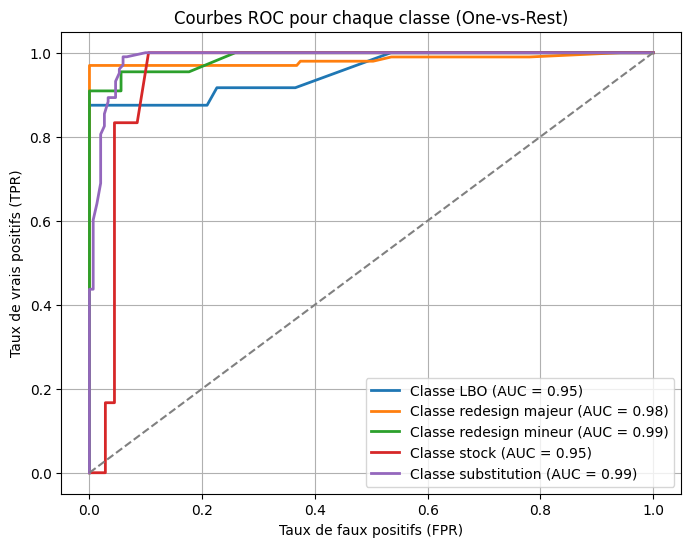

AUC Macro : 0.97, AUC Micro : 0.98


In [31]:
# Récupérer les classes uniques
classes = np.unique(y_test)
n_classes = len(classes)

# Binariser les labels (nécessaire pour calculer la courbe ROC)
y_test_binarized = label_binarize(y_test, classes=classes)

# Prédictions des probabilités pour toutes les classes
y_pred_proba = model.predict_proba(X_test)

# Tracer les courbes ROC pour chaque classe
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Classe {classes[i]} (AUC = {auc_score:.2f})')

# Ajouter la ligne de référence (aléatoire)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Mise en forme du graphe
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC pour chaque classe (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

auc_macro = roc_auc_score(y_test_binarized, y_pred_proba, average="macro")
auc_micro = roc_auc_score(y_test_binarized, y_pred_proba, average="micro")
print(f"AUC Macro : {auc_macro:.2f}, AUC Micro : {auc_micro:.2f}")



# Grid search

In [32]:
# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser la recherche de grille
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Exécuter le Grid Search
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Meilleurs paramètres : {best_params}")

# Prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test)

# Évaluer la performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle optimisé : {accuracy:.2f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Précision du modèle optimisé : 0.94

Rapport de classification :
                 precision    recall  f1-score   support

            LBO       1.00      0.88      0.93        24
redesign majeur       1.00      0.97      0.98        99
redesign mineur       1.00      0.91      0.95        22
          stock       0.00      0.00      0.00         6
   substitution       0.88      1.00      0.94       103

       accuracy                           0.94       254
      macro avg       0.78      0.75      0.76       254
   weighted avg       0.93      0.94      0.93       254



c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Random Forest en supprimant les colonnes fortement corrélées

# Afficher la heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap des Corrélations")
plt.show()

# Trouver les colonnes fortement corrélées
corr_threshold = 0.8
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Sélectionner les paires de colonnes corrélées (et éviter les doublons)
high_corr_features = set()
for (col1, col2), value in corr_pairs.items():
    if col1 != col2 and value > corr_threshold:
        high_corr_features.add(col2)  # On enlève col2 arbitrairement

print(f"Colonnes supprimées pour éviter la multicolinéarité : {high_corr_features}")

# Séparer les features (X) et la cible (y)
target_column = "label"  # Remplace par le nom exact de ta colonne cible
X = df.drop(columns=[target_column] + list(high_corr_features), errors="ignore")
y = df[target_column]

# Encoder les variables catégorielles si nécessaire
X = pd.get_dummies(X, drop_first=True)

# Séparer les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialiser et entraîner le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Afficher la précision
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle après suppression des colonnes fortement corrélées : {accuracy:.2f}")

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"], yticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"])
plt.xlabel("Prédictions")
plt.ylabel("Réels")
plt.title("Matrice de confusion")
plt.show()

# Prise en compte p-value

In [39]:
# Liste des colonnes à supprimer
columns_to_drop = set()

# Identifier les colonnes à supprimer
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  
        col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
        correlation = corr_matrix.iloc[i, j]
        p_value = p_values.iloc[i, j]

        # Condition : forte corrélation ET p-value faible (significatif)
        if abs(correlation) > 0.8 and p_value < 0.05:
            print(f"Corrélation forte entre {col1} et {col2} (r={correlation:.2f}, p={p_value:.4f})")

            # Ajouter la colonne ayant le plus de valeurs manquantes à supprimer
            if df[col1].isna().sum() > df[col2].isna().sum():
                columns_to_drop.add(col1)
            else:
                columns_to_drop.add(col2)

# Supprimer les colonnes sélectionnées
df_cleaned = df.drop(columns=columns_to_drop)

print(f"\n Colonnes supprimées : {columns_to_drop}")

Corrélation forte entre repair complexity (0NA) et generally at least equivalent criterion (r=-0.94, p=0.0000)
Corrélation forte entre component having a role in security (0NA) et substitution component not available (0NA) (r=0.86, p=0.0000)
Corrélation forte entre is the product recent? (<10 years) (0NA) et do we have equipment to carry out approval tests? (0NA) (r=-0.91, p=0.0000)

 Colonnes supprimées : {'do we have equipment to carry out approval tests? (0NA)', 'generally at least equivalent criterion', 'substitution component not available (0NA)'}


Précision du modèle après suppression des colonnes fortement corrélées : 0.98


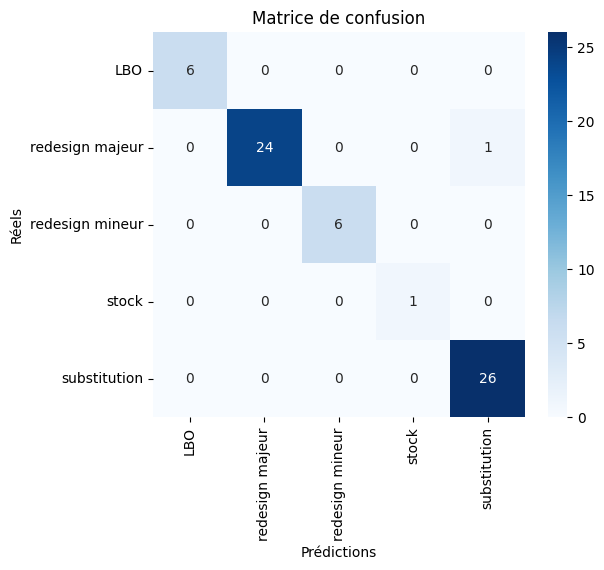

In [40]:
# Séparer les features (X) et la cible (y)
target_column = "label"  # Remplace par le nom exact de ta colonne cible
X = df.drop(columns=[target_column] + list(high_corr_features), errors="ignore")
y = df[target_column]

# Encoder les variables catégorielles si nécessaire
X = pd.get_dummies(X, drop_first=True)

# Séparer les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialiser et entraîner le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Afficher la précision
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle après suppression des colonnes fortement corrélées : {accuracy:.2f}")

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"], yticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"])
plt.xlabel("Prédictions")
plt.ylabel("Réels")
plt.title("Matrice de confusion")
plt.show()

# Smote NC

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Columns: 105 entries, symbol to no longer supply (new or used), no longer supply new, reparable, supply new_supply new
dtypes: bool(95), float64(1), int64(9)
memory usage: 54.3 KB


In [ ]:
categorical_features = X.nunique()[X.nunique() == 2].index.tolist()  # Colonnes ayant seulement 2 valeurs (0/1)
print(len(categorical_features))
# ✅ Déterminer les indices des colonnes catégoriques pour SMOTENC
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_features]

101


In [ ]:
# Stocker la colonne "symbol" pour l'afficher plus tard
X["symbol"] = df["symbol"]
# ✅ Séparer les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("🔹 Répartition des labels dans y_train AVANT SMOTENC :", Counter(y_train))

# ✅ Appliquer SMOTENC uniquement sur l'ensemble d'entraînement
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
# ✅ Réindexer pour éviter les conflits
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns).reset_index(drop=True)
y_train_resampled = pd.Series(y_train_resampled).reset_index(drop=True)
print("🔹 Répartition des labels y_train après SMOTE :", Counter(y_train_resampled))


X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# ✅ Vérifier si des lignes complètes de X_test existent aussi dans X_train_resampled
duplicates = X_test.merge(X_train_resampled, how='inner')
print(f" Nombre d'exemples du test présents dans le train (lignes identiques) : {len(duplicates)}")

🔹 Répartition des labels dans y_train AVANT SMOTENC : Counter({'substitution': 102, 'redesign majeur': 99, 'LBO': 24, 'redesign mineur': 22, 'stock': 6})
🔹 Répartition des labels y_train après SMOTE : Counter({'redesign majeur': 102, 'substitution': 102, 'redesign mineur': 102, 'LBO': 102, 'stock': 102})
 Nombre d'exemples du test présents dans le train (lignes identiques) : 0


## Affichage de la nouvelle repartition des données

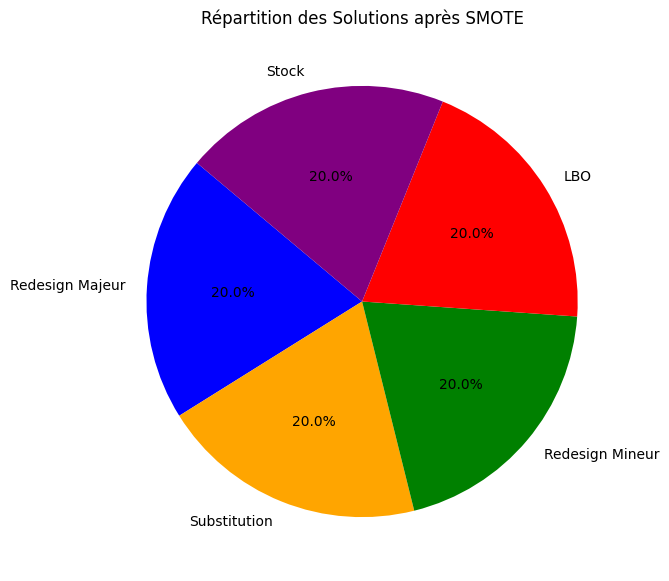

In [ ]:
# ✅ Définir les données du pie chart
labels = ['Redesign Majeur', 'Substitution', 'Redesign Mineur', 'LBO', 'Stock']
sizes = [102, 102, 102, 102, 102]  # Fréquences après SMOTE

# ✅ Création du pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Répartition des Solutions après SMOTE")
plt.show()

## Random forest Après SMOTE NC

In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test, n_estimators=100, random_state=42):
   
    # ✅ Initialiser et entraîner le modèle
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, class_weight="balanced")
    model.fit(X_train, y_train)

    # ✅ Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # ✅ Calculer la précision et afficher le rapport de classification
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Précision du modèle Random Forest : {accuracy:.2f}")
    print("\n🔹 Rapport de classification :")
    print(classification_report(y_test, y_pred))

    return model, y_pred  # Retourne le modèle entraîné et les prédictions


In [ ]:
model, y_pred = train_and_evaluate(X_train_resampled, y_train_resampled, X_test, y_test)





🔹 Précision du modèle Random Forest : 1.00

🔹 Rapport de classification :
                 precision    recall  f1-score   support

            LBO       1.00      1.00      1.00         6
redesign majeur       1.00      1.00      1.00        25
redesign mineur       1.00      1.00      1.00         6
          stock       1.00      1.00      1.00         1
   substitution       1.00      1.00      1.00        26

       accuracy                           1.00        64
      macro avg       1.00      1.00      1.00        64
   weighted avg       1.00      1.00      1.00        64



# Oversampling

In [ ]:
def oversample_and_train(X, y, test_size=0.2, n_estimators=100, random_state=42):
    # ✅ Stocker la colonne "symbol" si elle est présente
    if "symbol" in X.columns:
        X = X.drop(columns=["symbol"])  # On l'enlève avant le split

    # ✅ Séparer les données en train/test avec stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    print("🔹 Répartition des labels dans y_train AVANT oversampling :", Counter(y_train))

    # ✅ Appliquer RandomOverSampler sur Train SEULEMENT
    oversampler = RandomOverSampler(sampling_strategy='auto', random_state=random_state)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # ✅ Réindexation propre
    X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns).reset_index(drop=True)
    y_train_resampled = pd.Series(y_train_resampled).reset_index(drop=True)
    
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    print("🔹 Répartition des labels après oversampling :", Counter(y_train_resampled))

    # ✅ Vérifier les doublons entre train et test
    duplicates = X_test.merge(X_train_resampled, how='inner')
    print(f"🚨 Nombre d'échantillons du test présents dans le train : {len(duplicates)}")


    # 🚀 Entraîner et évaluer le modèle avec train_and_evaluate
    model, y_pred = train_and_evaluate(X_train_resampled, y_train_resampled, X_test, y_test, n_estimators, random_state)

    return model, y_pred, X_train_resampled, y_train_resampled


In [ ]:
model, y_pred, X_train_resampled, y_train_resampled = oversample_and_train(X, y)


🔹 Répartition des labels dans y_train AVANT oversampling : Counter({'substitution': 102, 'redesign majeur': 99, 'LBO': 24, 'redesign mineur': 22, 'stock': 6})
🔹 Répartition des labels après oversampling : Counter({'redesign majeur': 102, 'substitution': 102, 'redesign mineur': 102, 'LBO': 102, 'stock': 102})
🚨 Nombre d'échantillons du test présents dans le train : 0

🔹 Précision du modèle Random Forest : 0.98

🔹 Rapport de classification :
                 precision    recall  f1-score   support

            LBO       0.86      1.00      0.92         6
redesign majeur       1.00      1.00      1.00        25
redesign mineur       1.00      1.00      1.00         6
          stock       1.00      1.00      1.00         1
   substitution       1.00      0.96      0.98        26

       accuracy                           0.98        64
      macro avg       0.97      0.99      0.98        64
   weighted avg       0.99      0.98      0.98        64



# Matrice de confusion 

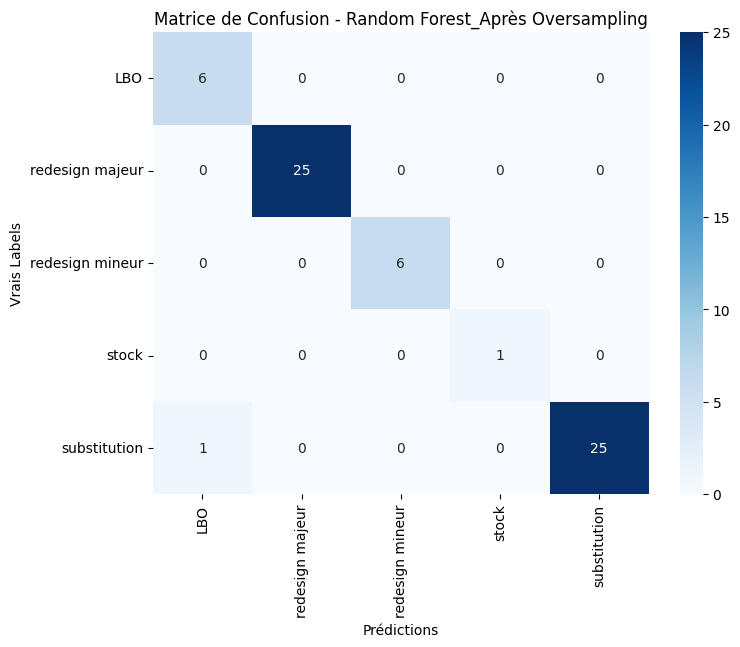

In [ ]:
# ✅ Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# 📊 Visualisation de la matrice de confusion
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédictions")
plt.ylabel("Vrais Labels")
plt.title("Matrice de Confusion - Random Forest_Après Oversampling")
plt.show()

# Faire un grand nombre d'essai

In [36]:
# Nombre de lots de prédictions
n_lots = 50
lot_size = 100  # Taille de chaque lot

X_test = pd.DataFrame(X_test)  # Conversion en DataFrame
y_test = pd.Series(y_test)  # Conversion en Series

# Assure-toi que X_test contient assez de données
n_samples = len(X_test)

# Liste pour stocker les résultats de chaque lot
results = []

# Lancer 50 prédictions sur des sous-ensembles
for i in range(n_lots):
    # Générer des indices aléatoires pour chaque sous-ensemble (avec remplacement)
    indices = np.random.choice(n_samples, lot_size, replace=True)  # Permet les répétitions
    X_subset = X_test.iloc[indices]
    y_subset = y_test.iloc[indices]
    
    # Faire des prédictions sur ce lot
    y_pred = model.predict(X_subset)
    
    # Calculer le rapport de classification pour obtenir la précision par classe
    class_report = classification_report(y_subset, y_pred, output_dict=True,zero_division=0)
    
    # Extraire la précision globale et par classe
    total_accuracy = class_report['accuracy']
    class_accuracies = {f'Class_{key}_accuracy': value['precision'] for key, value in class_report.items() if key.isdigit()}
    
    # Calculer les ratios de précision pour chaque classe
    total_samples = len(y_subset)
    class_ratios = {f'Class_{key}_precision_ratio': value['precision'] * total_samples for key, value in class_report.items() if key.isdigit()}
    
    # Ajouter ces résultats à la liste
    results.append({
        'Lot': i + 1,
        'Total_Accuracy': total_accuracy,
        **class_accuracies,
        **class_ratios  
    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Afficher le tableau des résultats
print(results_df)


    Lot  Total_Accuracy
0     1            0.98
1     2            0.98
2     3            0.98
3     4            0.99
4     5            0.99
5     6            0.98
6     7            0.97
7     8            0.97
8     9            0.98
9    10            0.98
10   11            0.96
11   12            0.98
12   13            0.95
13   14            1.00
14   15            1.00
15   16            1.00
16   17            0.99
17   18            1.00
18   19            0.99
19   20            1.00
20   21            1.00
21   22            0.97
22   23            0.96
23   24            0.99
24   25            0.96
25   26            1.00
26   27            1.00
27   28            1.00
28   29            1.00
29   30            1.00
30   31            0.98
31   32            0.99
32   33            0.99
33   34            1.00
34   35            0.99
35   36            0.98
36   37            0.98
37   38            1.00
38   39            0.98
39   40            0.97
40   41         